# Plots for differentiation and thermal evolution<a class="anchor" id="top"></a>
[Summary statistics](#stats)
For the whole thermal evolution:
+ [temperature](#temp)
+ [% silicate melted](#silicate)
+ [Rayleigh number](#critical-rayleigh)
+ [Stagnant lid thickness](#d0)
+ [Combined lid thickness and Ra](#Ra-bl)
+ [Urey ratio](#Urey)


For differentiation stage:
+ [% iron melted](#iron)

For the thermal evolution stage:
+ [temperatures and heat fluxes](#temp-heat)
+ [inner core size and magnetic Reynolds number](#Rem)
+ [magnetic field strength](#B)
+ [dynamo duration times](#duration)

## Set-up

In [1]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import sys
sys.path.append('../')
from load_info import load_run_info, load_run_results

#scale time to Myr
from plotting_constants import Myr, Tml, Tms

Choose run and whether you want to save figure

In [2]:
run=7
save = False# do you want to save your figures?
conduction = False #does the mantle switch to conduction
automated = False #if this run was one of an automated group
path = '../Results_combined/' #path to files

Load npz files for differentiation

In [3]:
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
iron = npzfile['Xfe']
silicate_d = npzfile['Xsi']
tdiff = npzfile['t_diff']
Ra_d = npzfile['Ra']
Ra_crit_d = npzfile['Ra_crit']
d0_diff = npzfile['d0']

Load npz files for thermal evolution

In [4]:
npzfile = np.load(f'{path}run_{run}.npz')
Tc= npzfile['Tc'] 
Tc_conv = npzfile['Tc_conv']
Tcmb = npzfile['Tcmb']
Tm_mid = npzfile['Tm_mid']
Tm_conv = npzfile['Tm_conv']
Tm_surf = npzfile['Tm_surf'] 
T_profile = npzfile['T_profile']
f = npzfile['f'] 

t = npzfile['t'] #time in s
Rem = npzfile['Rem'] # magnetic Reynolds number 
B = npzfile['B']/1e-6 # magnetic field strength [T] 
buoyr = npzfile['buoyr'] #compositional buoyancy flux/thermal buoyancy flux
Flux = npzfile['Flux']
Ra = npzfile['Ra'] 
RaH = npzfile['RaH'] 
RanoH = npzfile['RanoH'] 
Racrit = npzfile['Racrit'] 
d0 = npzfile['d0'] 
min_unstable = npzfile['min_unstable'] 
Urey = npzfile['Ur']
Xs = npzfile['Xs']
dl = npzfile['dl']
dx = npzfile['dc']
Fs = Flux[0]
Fcmb = Flux[1]
Fad = Flux[2]
Frad = Flux[3]

Run Info

In [5]:
if automated == True:
    r, dr, tstart, dt, viscosity = load_run_info(run,f'{path}auto_params.csv')
else: 
    r, dr, tstart, dt, viscosity = load_run_info(run,f'{path}run_info.csv')

Calculate silicate melt content for thermal evolution

In [6]:
nmantle = int((r/dr)/2)
silicate_t = (T_profile[:,nmantle:] - Tms)/(Tml-Tms)

Concatenate shared variables

In [7]:
Tall = np.hstack((Tdiff,np.transpose(T_profile)))
tall = np.append(tdiff,t)
iron_all = np.hstack
Ra_all = np.append(Ra_d,Ra)
Ra_crit_all = np.append(Ra_crit_d,Racrit)
d0_all = np.append(d0_diff,d0)

Scale time, choose whether or not to plot logarithmically

In [8]:
t_plot_all = tall/Myr
t_plot_t = t/Myr
log_time = True # do you want to plot time logarithmically

## Summary statistics <a class="anchor" id="stats"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [9]:
results = load_run_results(run,f'{path}run_results.csv')

In [10]:
print(f"Differentiation is at {results.at[0,'diff_time']:.2f} Myr")
print(f"The temperature at differentiation is at {results.at[0,'diff_T']:.2f}K")
print(f"Peak magma ocean temp is {results.at[0,'peakT']:.0f}K at {results.at[0,'tmax']:.2f} Myr")
print(f"Mantle hotter than the core until {results.at[0,'tstrat_remove']:.2f} Myr")
print(f"Erosion of stratification by {results.at[0,'terode']:.2f} Myr") 
print(f"End of mantle convection by {results.at[0,'fcond_t']/Myr:.2f} Myr")
print(f"The maximum Rem is {results.at[0,'max_R']:.2f} at {results.at[0,'max_Rt']:.2f} Myr")
print(f"The maximum field strength is {results.at[0,'max_B']:.2e} T at {results.at[0,'max_Bt']:.2f} Myr")

Differentiation is at 1.20 Myr
The temperature at differentiation is at 1516.56K
Peak magma ocean temp is 5339K at 6.80 Myr
Mantle hotter than the core until 46.49 Myr
Erosion of stratification by 48.89 Myr
End of mantle convection by 0.00 Myr
The maximum Rem is 25.54 at 99.69 Myr
The maximum field strength is 8.33e-06 T at 99.69 Myr


In [11]:
peak_coreT = np.amax(Tall[:nmantle,:])
loc_max = np.where(Tall[:nmantle,:]==peak_coreT)[1][0] #take the set of time coordinates and first value (they should all be the same)
tcoremax = tall[loc_max]/Myr
fcond_t = results.at[0,'fcond_t']/Myr
diff_T =results.at[0,'diff_T']

In [12]:
print(f'The peak core temperature is {peak_coreT:.0f}K at {tcoremax:.1f}Myr')

The peak core temperature is 3535K at 43.6Myr


On and off times for the dynamo

In [13]:
var_results = pd.read_csv(path+'run_results.csv',skiprows=[1])
on1=var_results.loc[var_results['run']==run,'magon_1'].values[0]
off1=var_results.loc[var_results['run']==run,'magoff_1'].values[0]
on2=var_results.loc[var_results['run']==run,'magon_2'].values[0]
off2=var_results.loc[var_results['run']==run,'magoff_2'].values[0]

## Temperature <a class="anchor" id="temp"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [14]:
import matplotlib.colors as mcolors

In [15]:
rplot = np.arange(0,int(r)+dr,int(dr))/1e3

In [16]:
r_unstable=np.array([]) 
for ind in min_unstable:
    r_unstable = np.append(r_unstable,rplot[int(ind)])
rc = r/2

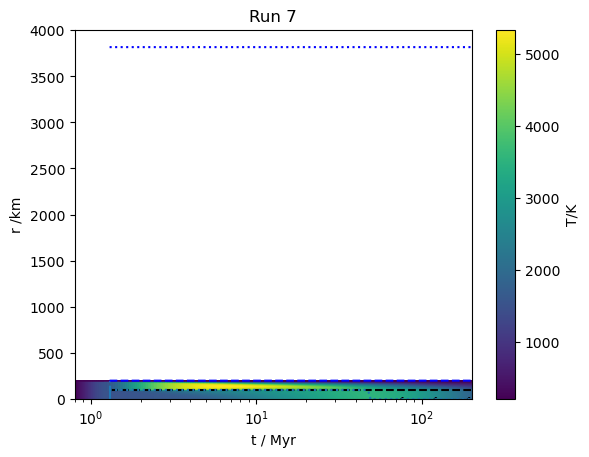

In [17]:
plt.figure()
plt.pcolormesh(t_plot_all,rplot,Tall,shading = 'gouraud')
plt.hlines(rc/1e3,min(t_plot_t),max(t_plot_all),linestyle='--',color='black',label='CMB')
plt.vlines(t_plot_t[0],0,r/1e3,linestyle='-.',label='Differentiation')
plt.fill_betweenx([0,rc/5e3],on1,off1,alpha=0,hatch='/',label='dynamo on')
if on2>0:
    plt.fill_betweenx([0,rc/5e3],on2,off2,alpha=0,hatch='/')
plt.plot(t_plot_t,r_unstable,linestyle='dotted',label='Convecting core')
if np.any(t_plot_t<fcond_t):
    plt.plot(t_plot_t[t_plot_t<=fcond_t],(r-d0[t_plot_t<=fcond_t])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t_plot_t[t_plot_t<=fcond_t],(rc+dl[t_plot_t<=fcond_t])/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
    plt.vlines(t_plot_t[t_plot_t<=fcond_t][-1],r/1e3,rc/1e3,linestyle='dotted',label='conductive mantle',color='red')
else:
    plt.plot(t_plot_t,(r-d0)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t_plot_t,(rc+dl)/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
#plt.vlines(t[f<0.999000][0]/Myr,0/1e3,rc/1e3,linestyle='dotted',label='beginning of core solidification',color='black')
#labels and limits
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.colorbar(label='T/K')
plt.title(f"Run {run}")
plt.xscale('log')
#plt.legend(bbox_to_anchor=[1.1,0.5])
if save == True:
    plt.savefig(f'../Plots/thermal_profile_{run}.png')

## Melted silicate content <a class="anchor" id="silicate"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

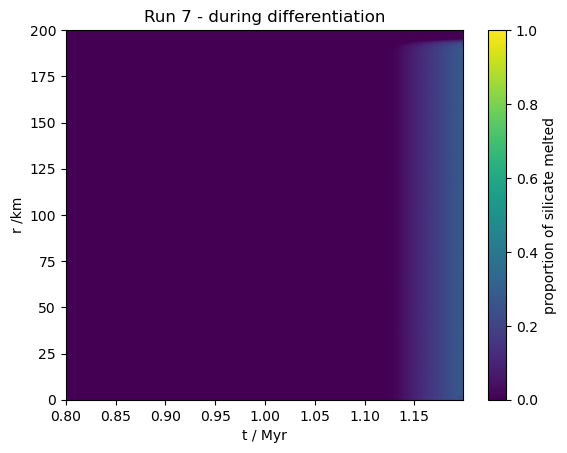

In [18]:
plt.figure()
plt.pcolormesh(tdiff/Myr, rplot,silicate_d,shading = 'gouraud',vmin=0,vmax=1) # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run} - during differentiation')
plt.colorbar(label='proportion of silicate melted')
if save ==True:
    plt.savefig(f'../Plots/si_diff_run_{run}.png')

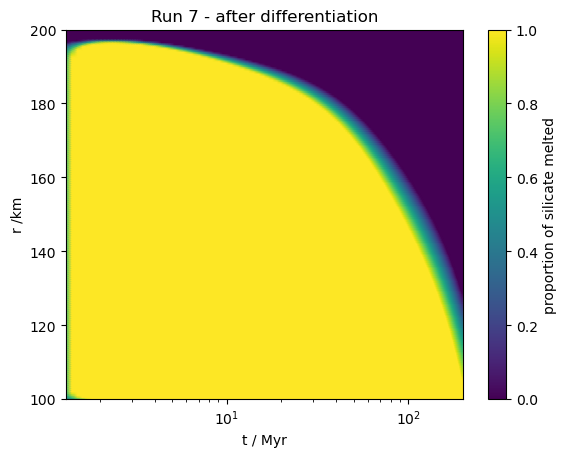

In [19]:
rmantle = np.arange(int(r/2),int(r+dr),int(dr))/1e3
plt.figure()
plt.pcolormesh(t/Myr, rmantle,np.transpose(silicate_t),shading = 'gouraud',vmin=0, vmax=1) # use same vmin and vmax as other plots to make them comparable
plt.xscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run} - after differentiation')
plt.colorbar(label='proportion of silicate melted')
if save ==True:
    plt.savefig(f'../Plots/si_therm_run_{run}.png')

## Rayleigh number<a class="anchor" id="critical-rayleigh"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

Blue scatter points are where Ra is less than 50% of critical. Orange points are where it is more than 110% of critical.

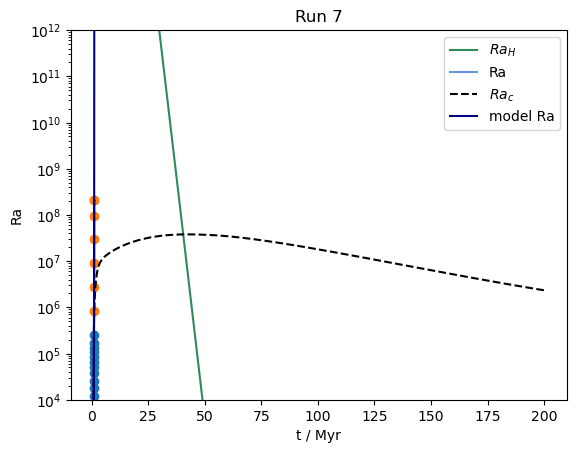

In [20]:
plt.figure()
plt.plot(tdiff/Myr,Ra_d,color='navy')
plt.plot(t/Myr,RaH,label='$Ra_H$',color='seagreen')
plt.plot(t/Myr,RanoH,label='Ra',color='cornflowerblue')
plt.plot(t_plot_all,Ra_crit_all,label='$Ra_c$',linestyle='dashed',color='black') 
plt.plot(t_plot_all,Ra_all,label='model Ra',color='navy') 
plt.scatter(t_plot_all[Ra_all/Ra_crit_all<0.5],Ra_all[Ra_all/Ra_crit_all<0.5])
plt.scatter(t_plot_all[Ra_all/Ra_crit_all>1.1],Ra_all[Ra_all/Ra_crit_all>1.1])
plt.ylim(bottom=1e0)#,top=1e8)
#plt.xlim([min(tall/Myr),5])
#plt.vlines(tdiff[-1]/Myr,1e3,1e18,linestyle='dotted',color='blue',label='differentiation')
#if conduction == True:
    #plt.vlines(cond_t,1e3,1e18,linestyle='dashed',color='k',label='conduction')
    #plt.xlim([min(tall/Myr),cond_t])
plt.ylabel('Ra')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('t / Myr')
#plt.xlim([0,100])
plt.ylim([1e4,1e12])
plt.title(f'Run {run}')
plt.legend()
#if save == True:
#plt.savefig(f'../Plots/Ra_run{run}.png')

Text(0.5, 0, 't / Myr')

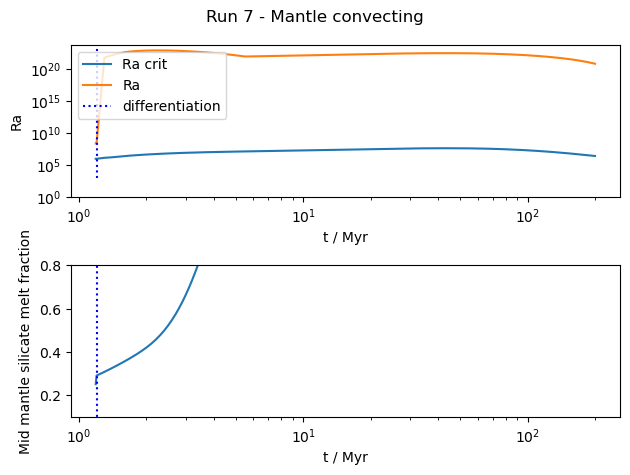

In [21]:
plt.figure(tight_layout=True)
plt.subplot(2,1,1)
plt.semilogy(t_plot_all[d0_all<r],Ra_crit_all[d0_all<r],label='Ra crit') 
plt.semilogy(t_plot_all[d0_all<r],Ra_all[d0_all<r],label='Ra') 
plt.ylim(bottom=1e0)
#plt.xlim([min(tall/Myr),30])
plt.vlines(tdiff[-1]/Myr,1e3,1e25,linestyle='dotted',color='blue',label='differentiation')
plt.ylabel('Ra')
plt.xscale('log')
plt.xlabel('t / Myr')
plt.legend()
plt.subplot(2,1,2)
plt.plot(t_plot_all[d0_all<r],(Tall[int(nmantle/2),d0_all<r]-1400)/400)
plt.vlines(tdiff[-1]/Myr,0,0.8,linestyle='dotted',color='blue',label='differentiation')
#plt.xlim([min(tall/Myr),30])
plt.ylim([0.1,0.8])
plt.xscale('log')
plt.ylabel('Mid mantle silicate melt fraction')
plt.suptitle(f'Run {run} - Mantle convecting')
plt.xlabel('t / Myr')
#if save == True:
    #plt.savefig(f'../Plots/Ra_phi_comp_run{run}.png',dpi=300)

## Stagnant lid thickness <a class="anchor" id="d0"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

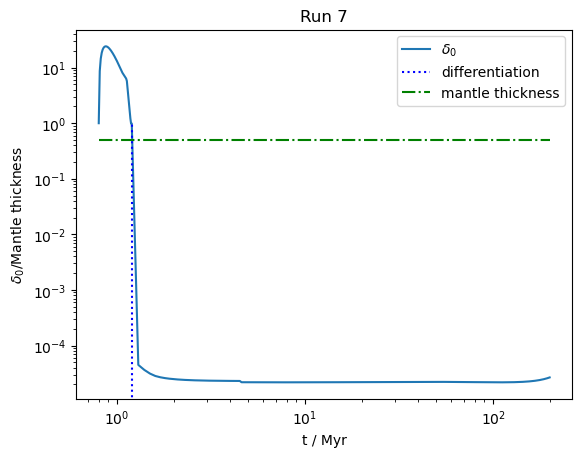

In [22]:
plt.figure()
plt.plot(tall/Myr,d0_all/r,label='$\delta_0$') 
#plt.ylim(top=1e0)
#plt.xlim([min(tall/Myr),25])
plt.vlines(tdiff[-1]/Myr,0,1,linestyle='dotted',color='blue',label='differentiation')
plt.hlines(0.5,min(tall/Myr),max(tall/Myr),linestyle='-.',color='green',label='mantle thickness')
if conduction == True:
    plt.vlines(cond_t,0,1,linestyle='dashed',color='k',label='conduction')
plt.ylabel('$\delta_0$/Mantle thickness')
plt.xlabel('t / Myr')
plt.xscale('log')
plt.yscale('log')
plt.title(f'Run {run}')
plt.legend()
if save == True:
    plt.savefig(f'../Plots/d0_run{run}.png')

### CMB boundary layer thickness

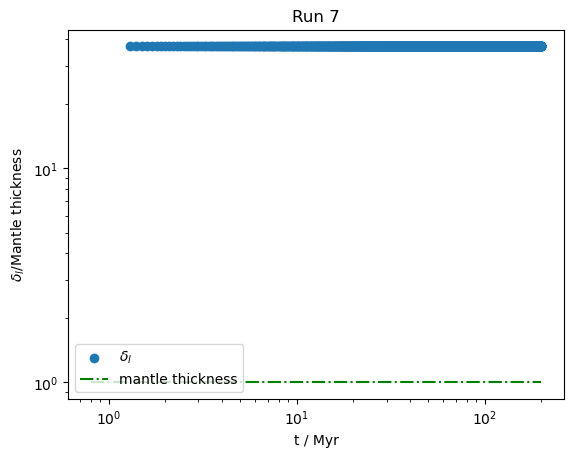

In [23]:
plt.figure()
plt.scatter(t_plot_t,dl/rc,label='$\delta_l$') 
#plt.ylim(top=1e0)
#plt.xlim([min(tall/Myr),25])
plt.hlines(1,min(tall/Myr),max(tall/Myr),linestyle='-.',color='green',label='mantle thickness')
if conduction == True:
    plt.vlines(cond_t,0,1,linestyle='dashed',color='k',label='conduction')
plt.ylabel('$\delta_l$/Mantle thickness')
plt.xlabel('t / Myr')
plt.xscale('log')
plt.yscale('log')
plt.title(f'Run {run}')
plt.legend()
if save == True:
    plt.savefig(f'../Plots/dl_run{run}.png')

## Combined b.l thickness and Ra <a class="anchor" id="Ra-bl"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

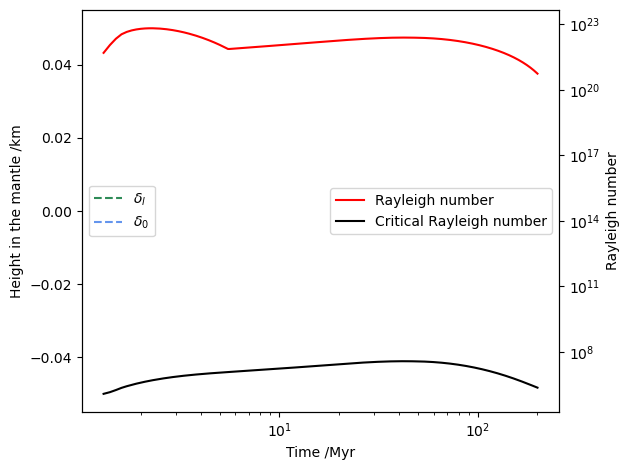

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=1,sharex='col',tight_layout=True)
ax2 = ax.twinx()
# boundary layer thickness
ax.plot(t_plot_t[(dl+d0)<rc],dl[(dl+d0)<rc]/1e3,label='$\delta_l$',color='seagreen',linestyle='dashed') 
ax.plot(t_plot_t[(dl+d0)<rc],rc/1e3-d0[(dl+d0)<rc]/1e3,label='$\delta_0$',color='cornflowerblue',linestyle='dashed')
# Rayleigh number
ax2.plot(t_plot_t,Ra,label='Rayleigh number',color='red')
ax2.plot(t_plot_t,Racrit,label='Critical Rayleigh number',color='black')

ax.set_ylabel('Height in the mantle /km')
ax.set_xlabel('Time /Myr')
ax2.set_ylabel('Rayleigh number')
ax2.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc='center left')
ax2.legend()

## Urey ratio  <a class="anchor" id="Urey"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

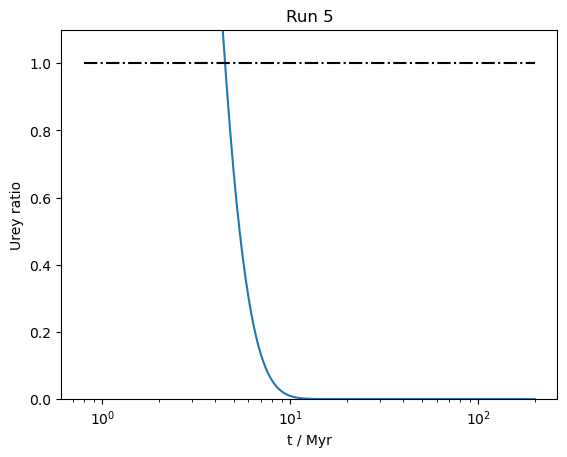

In [25]:
plt.figure()
plt.plot(t_plot_t,Urey) 
#plt.xlim([min(tall/Myr),25])
plt.hlines(1,min(tall/Myr),max(tall/Myr),linestyle='-.',color='black')
if conduction == True:
    plt.vlines(cond_t,0,1,linestyle='dashed',color='k',label='conduction')
    plt.legend()
plt.ylabel('Urey ratio')
plt.xlabel('t / Myr')
plt.xscale('log')
plt.ylim([0,1.1])
plt.title(f'Run {run}')
if save == True:
    plt.savefig(f'../Plots/Urey{run}.png')

## Melted iron content during differentiation<a class="anchor" id="iron"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

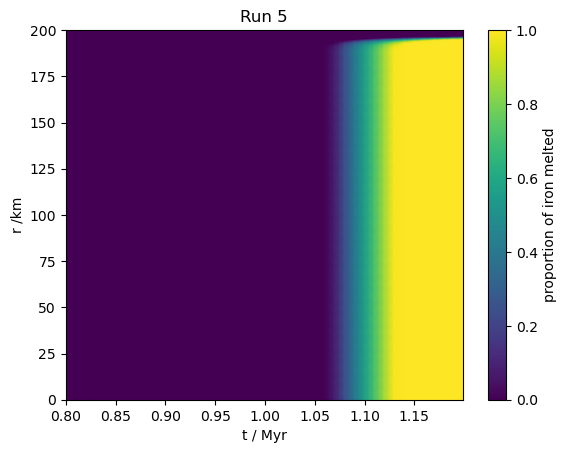

In [26]:
plt.figure()
plt.pcolormesh(tdiff/Myr, rplot,iron,shading = 'gouraud')#,vmin=0,vmax=1) # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([290,300])
plt.title(f'Run {run}')
plt.colorbar(label='proportion of iron melted')
if save ==True:
    plt.savefig(f'../Plots/fe_diff_run_{run}.png')

# Temperature and Flux Plot <a class="anchor" id="temp-heat"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

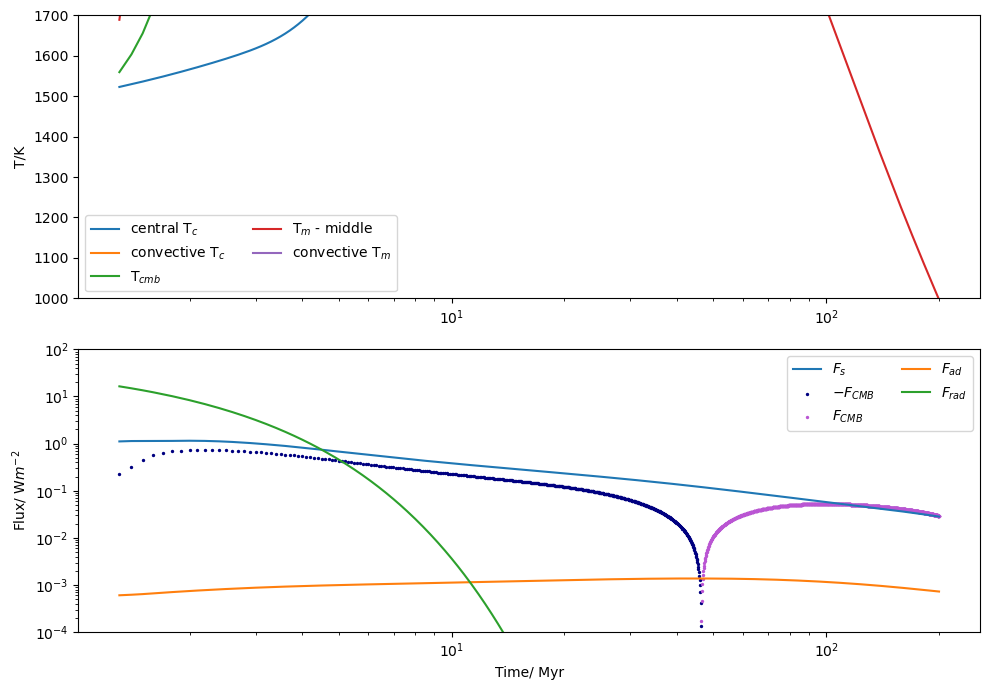

In [27]:
plt.figure(tight_layout=True,figsize=[10,7])
#plt.suptitle(f'Thermal evolution of a {r/1e3:.0f}km asteroid \n run {run} viscosity {viscosity}')

xmin=tstart

#temperatures as function of time
plt.subplot(2,1,1)
if log_time == True:
    plt.semilogx(t_plot_t,Tc,label='central T$_c$')
    plt.semilogx(t_plot_t[Tc_conv!=0],Tc_conv[Tc_conv!=0],label='convective T$_c$')
    plt.semilogx(t_plot_t,Tcmb,label='T$_{cmb}$')
    plt.semilogx(t_plot_t,Tm_mid,label='T$_m$ - middle')
    plt.semilogx(t_plot_t[Tm_conv!=0],Tm_conv[Tm_conv!=0],label='convective T$_m$')
    #plt.semilogx(t_plot_t,Tm_conv,label='convective T$_m$')
    #plt.semilogx(t_plot_t,Tm_surf,label='T$_m$ - surface')
else:
    plt.plot(t_plot_t,Tc,label='central T$_c$')
    plt.plot(t_plot_t[Tc_conv!=0],Tc_conv[Tc_conv!=0],label='convective T$_c$')
    plt.plot(t_plot_t,Tcmb,label='T$_{cmb}$')
    plt.plot(t_plot_t,Tm_mid,label='T$_m$ - middle')
    plt.plot(t_plot_t[Tm_conv!=0],Tm_conv[Tm_conv!=0],label='convective T$_m$')
    #plt.plot(t_plot_t,Tm_surf,label='T$_m$ - surface')
if conduction == True:
    plt.vlines(cond_t,ymin=min(Tm_surf),ymax=1600,color='black',linestyle='--',label='conduction')
plt.ylim([1000,1700]) #use these limits when comparing runs
plt.ylabel('T/K')
plt.legend(loc='lower left', ncol= 2)

#fluxes as function of time
plt.subplot(2,1,2)

Fcmb_neg = Fcmb[Fcmb<0]
Fcmb_pos = Fcmb[Fcmb>0]
if log_time == True:
    plt.loglog(t_plot_t,Fs,label='$F_s$')
    plt.scatter(t_plot_t[Fcmb<0],abs(Fcmb_neg),label='$-F_{CMB}$',color='navy',s=2)
    plt.scatter(t_plot_t[Fcmb>0],Fcmb_pos,label='$F_{CMB}$',color='mediumorchid',s=2)
    plt.loglog(t_plot_t,Fad,label='$F_{ad}$')
    plt.loglog(t_plot_t,Frad,label='$F_{rad}$')
else:
    plt.semilogy(t_plot_t,Fs,label='$F_s$')
    plt.scatter(t_plot_t[Fcmb<0],abs(Fcmb_neg),label='$-F_{CMB}$',color='navy',s=2)
    plt.scatter(t_plot_t[Fcmb>0],Fcmb_pos,label='$F_{CMB}$',color='mediumorchid',s=2)
    plt.semilogy(t_plot_t,Fad,label='$F_{ad}$')
    plt.semilogy(t_plot_t,Frad,label='$F_{rad}$')
plt.xlabel('Time/ Myr')

plt.ylim([1e-4,1e2])   #use these limits when comparing runs
plt.ylabel('Flux/ W$m^{-2}$')
plt.legend(loc='upper right',ncol=2)

if save == True:
    plt.savefig('../Plots/run_{}_Tflux.png'.format(run),dpi=450)


# Magnetic Field Strength <a class="anchor" id="B"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [28]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

threshold=10
size=2.5 #size of points on scatter plot

#B plot
ln3 = ax[0].plot(t_plot_t,np.ma.masked_where(Rem<threshold,B),label='Magnetic field strength')
ln4 = ax2.plot(t_plot_t[buoyr>0],buoyr[buoyr>0],alpha=0.5,linestyle='dashed',label='Buoyancy/thermal flux')

#Rem plot
ln1 = ax[1].plot(t_plot_t,np.ma.masked_where(Rem<=0,Rem),label='Rem')
ln2 = ax3.plot(t_plot_t[buoyr>0],buoyr[buoyr>0],linestyle='dashed',alpha=0.5, label='Buoyancy/thermal flux')

ax[1].hlines(10,xmin=0,xmax=t_plot_t[Rem>0][-1],color='dimgray',linestyle='--')
ax[1].hlines(40,xmin=0,xmax=t_plot_t[Rem>0][-1],color='dimgray',linestyle='-.')
ax[1].hlines(100,xmin=0,xmax=t_plot_t[Rem>0][-1],color='dimgray',linestyle='dotted')

ax[0].set_ylabel('Surface dipole field strength $\\mu$T')
ax[1].set_ylabel('Magnetic Reynolds number')
ax2.set_ylabel('Buoyancy flux/thermal flux')
ax3.set_ylabel('Buoyancy flux/thermal flux')

ax[1].set_xlabel('Time/Myr')
ax[0].legend(ln3+ln4,['magnetic field strength','Buoyancy flux/thermal flux'],loc='upper center')
ax[1].legend(ln1+ln2,['Rem','Buoyancy flux/thermal flux'],loc='upper center')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax[0].set_title('Magnetic field strength')
ax[1].set_title('Magnetic Reynolds number')
ax[1].set_xlim(left=0.8)

if save==True:
    plt.savefig(f'../Plots/BRem_buoy_{run}.png',dpi=450,bbox_inches='tight')

Error in callback <function _draw_all_if_interactive at 0x7f037d62a3a0> (for post_execute):


ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 1000x800 with 4 Axes>

## Magnetic Reynolds number and inner core size <a class="anchor" id="Rem"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

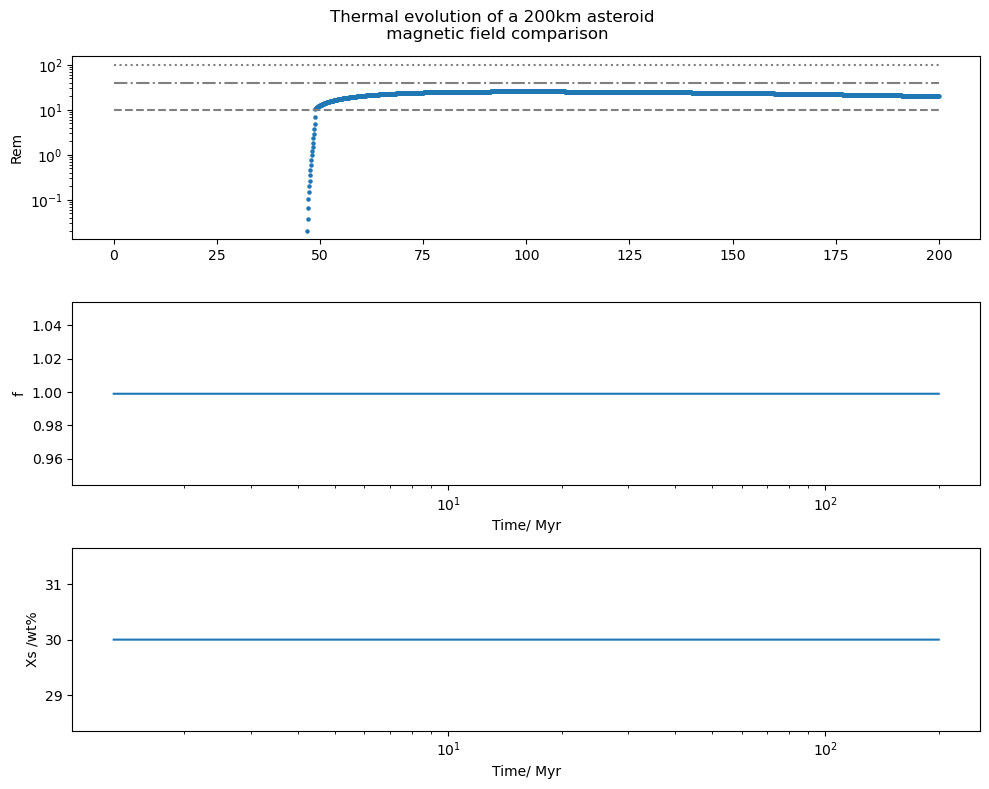

In [29]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Thermal evolution of a {r/1e3:.0f}km asteroid \n magnetic field comparison')
plt.subplot(3,1,1)
plt.scatter(t_plot_t,Rem,s=5)
plt.hlines(10,xmin=0,xmax=t_plot_t[-1],color='gray',linestyle='--')
plt.hlines(40,xmin=0,xmax=t_plot_t[-1],color='gray',linestyle='-.')
plt.hlines(100,xmin=0,xmax=t_plot_t[-1],color='gray',linestyle='dotted')
#plt.xlabel('Time/Myr')
plt.ylabel('Rem')
plt.yscale('log')
#plt.xscale('log')
#plt.xlim([100,200])

plt.subplot(3,1,2)
plt.plot(t_plot_t,f,label='f')
plt.xscale('log')
plt.xlabel('Time/ Myr')
plt.ylabel('f')

plt.subplot(3,1,3)
plt.plot(t_plot_t,Xs,label='Xs')
plt.xscale('log')
plt.xlabel('Time/ Myr')
plt.ylabel('Xs /wt%')


if save == True:
    plt.savefig('../Plots/run_{}_Remf.png'.format(run),dpi=450)

## Dynamo duration <a class="anchor" id="duration"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [30]:
from duration_calc import on_off_load

In [31]:
print(f'The dynamo starts at {on1:.2f} Myr, stops at {off1:.2f} Myr and lasts {off1-on1:.2f} Myr')
if on2 > 0:
    print(f'The second dynamo starts at {on2:.2f} Myr, stops at {off2:.2f} Myr and lasts {off2-on2:.2f} Myr')

The dynamo starts at 48.89 Myr, stops at 199.98 Myr and lasts 151.09 Myr
